In [92]:
# Import the torch module
import torch

# Getting data

In [93]:
# temperature data in good old Celsius and measurements from a new thermometer.
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u  # feature scaling

# Choosing Linear Model and Loss Function

In [115]:
# linear model function
def model(t_u, w, b):
    return w * t_u + b

# mean square error as loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Defining Traning Loop with autograd

In [116]:
# training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        # Calling backward will lead derivatives to accumulate at leaf nodes. We need to zero the gradient explicitly after using it for parameter updates.
        if params.grad is not None:  # this could be done at any point in the loop prior to calling loss.backward()
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        # perform gradient-descent optimization on parameters
        # Note: we update params in place. This means we keep the same params tensor around but subtract our update from it.
        # When using autograd, we usually avoid inplace updates because PyTorch’s autograd engine might need the values we would be modifying for the backward pass
        #print('params.grad -->', params.grad)
        #params = params - learning_rate * params.grad
        #params -= learning_rate * params.grad
        #params.add_(params.grad, alpha=-learning_rate)
        with torch.no_grad():
          params -= learning_rate * params.grad
          #params = params - learning_rate * params.grad  # we may try to avoid this

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params, loss

# Training

In [117]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
params, loss = training_loop(n_epochs = 5000, learning_rate = 1e-2,  params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, learned_params[0], learned_params[1])

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())   # as t_p is a tensor computed, we detach it from the current graph before converting to numpy array, check https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")

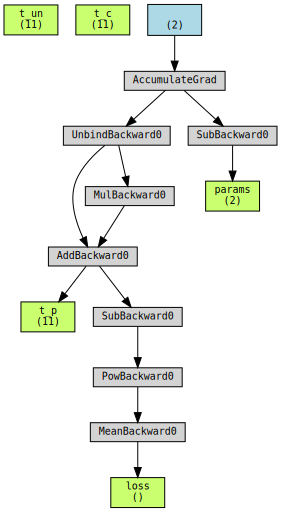

In [118]:
# Install and import module for a visualization of the computational graph
!pip install torchviz
from torchviz import make_dot
# the following tests if we use "params = params - 1"
params = torch.tensor([1.0, 0.0], requires_grad=True)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

params = params - 1

make_dot((t_un,t_c,t_p,params,loss), params ={'t_un':t_un, 't_c':t_c,'t_p':t_p,'params':params, 'loss':loss})